# **Introduction and Visualization**

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the filein csv format

filename = 'diabetes.csv'
data = pd.read_csv(filename)
data.head(20)
data.describe()

FileNotFoundError: [Errno 2] File diabetes.csv does not exist: 'diabetes.csv'

# **Replacing missing values and removing outliers**

In [62]:
# Replacing missing values

cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[cols] = data[cols].replace(['0', 0], np.nan)

#data.fillna(data.mean(), inplace=True)
data.dropna(axis=0, how='any',inplace=True)
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

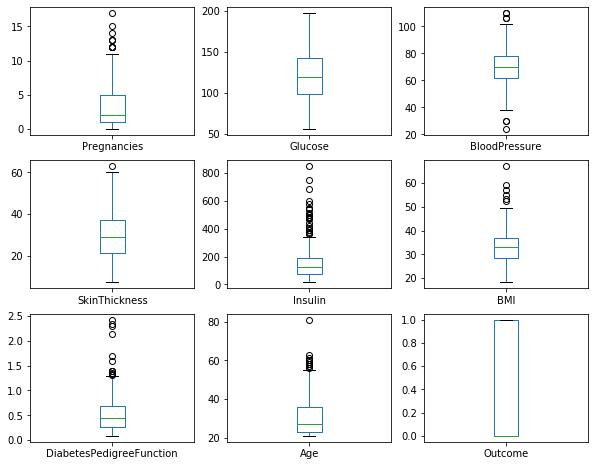

In [63]:
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [64]:
# Outlier removal & Visualization
# kept lower quantile as 10% and higher quantile as 90%
# quantile function returns value at the given quantile

filt_df = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]
low = .1
high = .9
quant_df = filt_df.quantile([low, high])
print(quant_df)

filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)

#filt_df.dropna(axis=0, how='any',inplace=True)
print("*******after outlier removal*********")
#filt_df.describe()

data['Glucose']=filt_df['Glucose']
data['BloodPressure']=filt_df['BloodPressure']
data['SkinThickness']=filt_df['SkinThickness']
data['Insulin']=filt_df['Insulin']
data['BMI']=filt_df['BMI']
data['DiabetesPedigreeFunction']=filt_df['DiabetesPedigreeFunction']

data.dropna(axis=0, how='any',inplace=True)

data.describe()

     Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0.1     87.0           56.0           15.0     51.1  24.42   
0.9    170.9           86.0           43.0    292.8  42.07   

     DiabetesPedigreeFunction  
0.1                    0.1834  
0.9                    0.9422  
*******after outlier removal*********


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,3.745614,122.552632,70.482456,29.026316,136.973684,32.777193,0.477325,31.596491,0.359649
std,3.526916,22.263543,7.406326,6.979693,56.146688,4.165302,0.201759,10.661916,0.482016
min,0.000000,88.000000,58.000000,16.000000,53.000000,24.700000,0.189000,21.000000,0.000000
25%,1.000000,103.000000,64.000000,23.500000,94.000000,29.575000,0.287500,24.000000,0.000000
50%,2.000000,121.000000,72.000000,29.000000,125.500000,33.200000,0.453500,28.000000,0.000000
75%,6.000000,140.500000,76.000000,34.000000,175.750000,35.375000,0.648500,37.750000,1.000000
max,17.000000,170.000000,85.000000,41.000000,291.000000,41.800000,0.893000,81.000000,1.000000


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

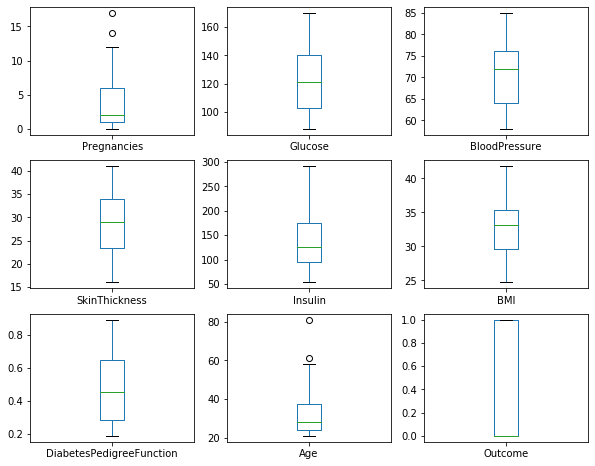

In [65]:
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

# **Data splitting and model compiling**

In [66]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [67]:
# split into input (X) and output (y) variables
X = data.iloc[:,0:8]
Y = data.iloc[:,8]

In [68]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32
25,10,125.0,70.0,26.0,115.0,31.1,0.205,41
31,3,158.0,76.0,36.0,245.0,31.6,0.851,28
63,2,141.0,58.0,34.0,128.0,25.4,0.699,24
...,...,...,...,...,...,...,...,...
738,2,99.0,60.0,17.0,160.0,36.6,0.453,21
742,1,109.0,58.0,18.0,116.0,28.5,0.219,22
745,12,100.0,84.0,33.0,105.0,30.0,0.488,46
751,1,121.0,78.0,39.0,74.0,39.0,0.261,28


In [69]:
Y.head(10)

14    1
19    1
25    1
31    1
63    0
69    0
70    1
71    0
85    0
87    0
Name: Outcome, dtype: int64

In [70]:
#scaling the data
from sklearn.preprocessing import scale
X = scale(X)

In [71]:
#spiltting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

![](activation.png)

In [75]:
# define the keras model
# Sequential class adds layers in stack
# Dense: used to create a deeply connected layer
# relu: Rectified linear unit, which is linear for positive values and 0 for negative values
# sigmoid: it is used as its output is between 0 and 1, for prediction purposes
# nbrHID = sqrt(nbrINP * nbrOUT)

model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


![](ANN.png)

In [76]:
# compile the keras model
# loss: measures how accurate the output is 
# binary_crossentropy: is used if the output is binary, like prediction model
# optimizer: algorithm used to optimize the process
# adam: to update network weights iterative based in training data.
# metrics: to judge the performance of the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','mse','AUC'])

# **Model training, Evaluation, Prediction** 

In [77]:
# training the model
# epochs: one forward pass and one backward pass of all the training examples
# batch_size: the number of training examples in one forward/backward pass.
# verbose: training progress

model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)

In [78]:
scores = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 3.0994 - accuracy: 0.6316 - mse: 0.3025 - auc: 0.5969


In [51]:
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]
rounded

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]